In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import seaborn as sns



In [95]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [96]:
df.dropna(inplace=True)
X = np.array(df.drop(["Sales"], axis=1))
y = np.array(df["Sales"])

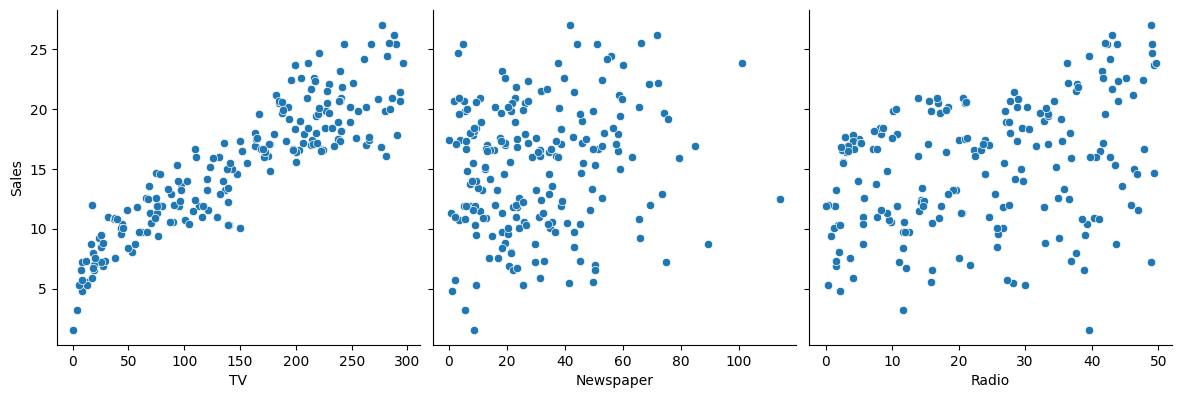

In [97]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [99]:
lr = LinearRegression(
    
)
lr.fit(X_train,y_train)

LinearRegression()

In [100]:
lr.score(X_test,y_test)

0.9047600759025133

In [101]:
cb = CatBoostRegressor(diffusion_temperature=0.6,learning_rate=0.0085,random_seed=12)
cb.fit(X_train, y_train)

0:	learn: 5.2573684	total: 4.18ms	remaining: 4.18s
1:	learn: 5.2310754	total: 4.56ms	remaining: 2.28s
2:	learn: 5.2010677	total: 4.94ms	remaining: 1.64s
3:	learn: 5.1731283	total: 5.56ms	remaining: 1.39s
4:	learn: 5.1451794	total: 6.19ms	remaining: 1.23s
5:	learn: 5.1203825	total: 6.67ms	remaining: 1.1s
6:	learn: 5.0967490	total: 7.05ms	remaining: 1s
7:	learn: 5.0703607	total: 7.57ms	remaining: 938ms
8:	learn: 5.0471557	total: 8.07ms	remaining: 889ms
9:	learn: 5.0194356	total: 8.48ms	remaining: 840ms
10:	learn: 4.9994746	total: 8.91ms	remaining: 801ms
11:	learn: 4.9747575	total: 9.6ms	remaining: 790ms
12:	learn: 4.9487238	total: 10.1ms	remaining: 766ms
13:	learn: 4.9220663	total: 10.4ms	remaining: 733ms
14:	learn: 4.8987337	total: 10.8ms	remaining: 710ms
15:	learn: 4.8745441	total: 11.3ms	remaining: 692ms
16:	learn: 4.8497104	total: 11.7ms	remaining: 675ms
17:	learn: 4.8275875	total: 12.1ms	remaining: 659ms
18:	learn: 4.8038605	total: 12.4ms	remaining: 639ms
19:	learn: 4.7782337	total:

In [102]:
cb.score(X_test,y_test)

0.9228021306598332

In [103]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.085 , max_depth = 6)
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.085, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
xgb.score(X_test,y_test)

0.9535265405218595

In [108]:
cb.predict(np.array([47.5,56.9,69]))


13.168451599676379

In [109]:
lr.predict([[47.5,56.9,69]])

array([13.42808803])

In [110]:
xgb.predict([[47.5,56.9,69]])

array([13.674625], dtype=float32)